# Labb 2
Labb 2 - Pandas och data processing
Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.
Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.


# Uppgift 1

I den här uppgiften ska du visualisera med hjälp av matplotlib

- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena (engelska, matematik, svenska, svenska som andraspråk). Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.



In [2]:
import pandas as pd
sheet_names = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]    #Spara sheet-names i en lista
df_list = [pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name=sheet, header=8) for sheet in sheet_names] #Läs excel-filen och loopa igenom med list comprehension för att hämta ut varje fil med respektive sheet-name, spara i en lista

column_names = ["Plats","Huvudman","Totalt (A-F)","Flickor (A-F)","Pojkar (A-F)","Totalt (A-E)","Flickor (A-E)","Totalt (A-E)","Totalt (Poäng)","Flickor (Poäng)", "Pojkar (Poäng)"] #De rätta kolumn-namnen

# Gör på detta pytoniska sätt ist: 
for df in df_list:                                      # För varje DataFrame-objekt i df_list
    df.columns = column_names                           # Byt till de rätta kolumn-namnen
    df.replace("..", 0, inplace=True) #byt ut ".." till 0. inplace ändrar df på plats direkt i listan, annars blir ändringen bara på variabeln i loopen.
df_list[3]  #Testutskrift på index 3

C:\Users\Lukas\AppData\Local\Temp\ipykernel_10572\2818561600.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("..", 0, inplace=True) #byt ut ".." till 0. inplace ändrar df på plats direkt i listan, annars blir ändringen bara på variabeln i loopen.


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Totalt (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- b) För de olika ämnena, rita en stapeldiagram på totala poängen för de olika huvudmännen. Placera alla diagram i en plott med subplottar


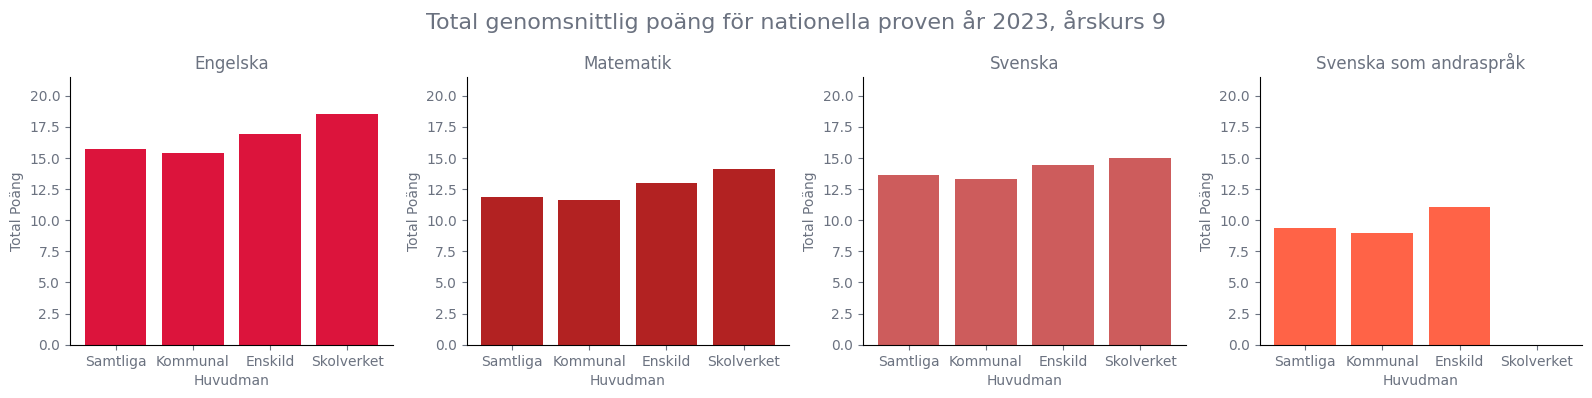

In [ ]:
import matplotlib.pyplot as plt

titles = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"] #Titlarna
colors = ["#DC143C", "#B22222", "#CD5C5C", "#FF6347"]                          # Unik färg för varje sub-plot 
GRAY ="#6b7280"

fig, ax = plt.subplots(1,len(df_list),figsize =(16,4))                  #Skapa fig och ax objekt, antal subplottar = Längden på df_list. Sätter figurens storlek
for ax, df, titles, colors in zip(ax, df_list, titles, colors):         #Loopa igenom dessa listor och..
    ax.bar(df["Huvudman"], df["Totalt (Poäng)"], color=colors)          #Skapa stapeldiagram med x="Huvudman", y="Totalt (Poäng)", Sätt en unik färg för varje sub-plot
    ax.set(                                                                                      #Sätt titlar och x-y-label        
        ylim= (0, max(df["Totalt (Poäng)"].max() for df in df_list)+3)  #Sätt y-max värde till maxvärde +3 från kolumnen ["Totalt (Poäng)"]
        )
    ax.set_title(label=titles, color=GRAY)
    ax.set_xlabel("Huvudman", color=GRAY)
    ax.set_ylabel("Total Poäng", color=GRAY)
    ax.tick_params(axis="both", colors=GRAY)
    ax.spines[["top","right"]].set_visible(False)

fig.suptitle("Total genomsnittlig poäng för nationella proven år 2023, årskurs 9",fontsize=16, color=GRAY) #Lägg en titel för hela figuren
fig.tight_layout(pad=1)     #Få mer white-space mellan subplottar och figurens kant
fig.savefig("visualiseringar/Uppgift1")     #Spara



In [ ]:
#1. ta bort index [0][0] och [1][0] / där den innehåller unnamed
#2. slica alla kolumner som är på [i][0] och gör dom till en 
# df_eng.columns[0][0]
# for i in range(len(df_eng.columns)):
#     if df_eng.columns[i] == "Unnamed: 0_level_0":# == "Unnamed%":
#         df_eng.columns = df_eng.columns[i].drop()

# df_eng.columns.drop("")

# df_eng = df_eng.drop(columns=[0])
# df_eng.rename(df_eng.columns[0] == "")
# df_eng

# # for f in file_list: 
# #     f.columns = f.loc[7]
# #     print(f.columns)

# for i in range(len(file_list)): 
#     file_list[i].columns = file_list[i].iloc[7]
#     file_list[i] = file_list[i][8:].reset_index(drop=True)

# df_eng = file_list[0] 
# df_math = file_list[1] 
# df_swe = file_list[2] 
# df_swean = file_list[3] 

# df_eng.columns = df_eng.loc[7]
# df_eng = df_eng[8:]
# df_eng

# df_eng = df_eng.rename(
#     columns={
#         df_eng.columns[0][1]: "Plats",
#         "Typ av huvudman": "Huvudman",
#         "Totalt": "Totalt (A-F)",
#         "Flickor": "Flickor (A-F)",
#         "Pojkar": "Pojkar (A-F)",
#         "Totalt": "Totalt (A-E)",
#         "Flickor": "Flickor (A-E)",
#         "Pojkar": "Totalt (A-E)",
#         "Totalt": "Totalt (Poäng)",
#         "Flickor": "Flickor (Poäng)",
#         "Pojkar": "Pojkar (Poäng)",
#     }
# )
# df_eng
# # file_list[0].columns
# for j in range(len(df_list)):
#     for i in range(len(column_names)):
#         df_list[j]=df_list[j].rename(columns={df_list[j].columns[i]: column_names[i]})

# df_eng = df_list[0]
# df_math = df_list[1]
# df_swe = df_list[2]
# df_swean = df_list[3]
    # df_list[j]=df_list[j].rename(columns={df_list[j].columns[i]: column_names[i]})



# Läs in filerna direkt här
# df_dict["Svenska som andraspråk"]
# df_dict = {
#     "Engelska": pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Engelska", header=8),
#     "Matematik": pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Matematik", header=8),
#     "Svenska": pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Svenska",header=8),
#     "Svenska som andraspråk": pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Svenska som andraspråk",header=8)
# }
# df_list = [df_dict]
# for df in df_list: 
#     df.columns = column_names
# #     print(df)
# df_math = pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Matematik", header=8)
# df_swe = pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Svenska",header=8)
# df_swean = pd.read_excel("files/riket2023_åk9_np.xlsx",sheet_name="Svenska som andraspråk",header=8)
# df_swean = df_swean.replace("..", 0)
# for i, df in enumerate(df_list):
#     x = df.get("Huvudman")
#     y = df.get("Totalt (Poäng)")
#     ax[i].set_ylim(0,20)
#     ax[i].bar(x,y, color=colors[i])
#     ax[i].set(
#         title=titles[i],
#         ylabel = "Totala Poäng",
#         xlabel = "Huvudman",
#         )
# ax_list = ["ax1", "ax2", "ax3","ax4"]

